# Logistic Regression Project Exercise

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**


## Imports

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data

This database contains 14 physical attributes based on physical testing of a patient. 
 
The "goal" field refers to the presence of heart disease in the patient. 

It is integer (0 for no presence, 1 for presence). 

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----
**Read in the data.**

In [8]:
df = pd.read_csv("heart.csv")

### Exploratory Data Analysis and Visualization

**Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Code Here
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Visualization Tasks

**Create a bar plot that shows the total counts per target value.**

<AxesSubplot:xlabel='target', ylabel='count'>

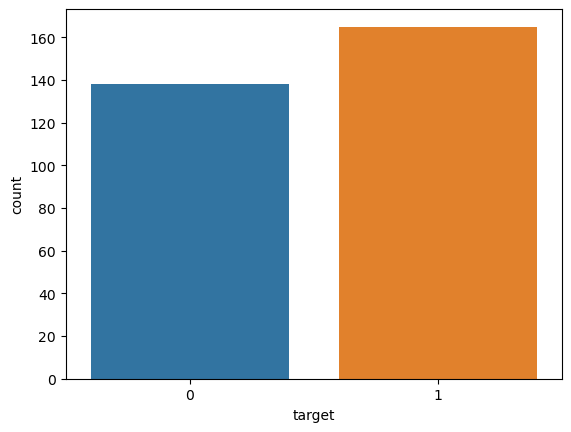

In [19]:
# 0 for no presence of heart disease, 1 for presence of heart disease
# Code Here
sns.countplot(x='target',data=df)

**Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

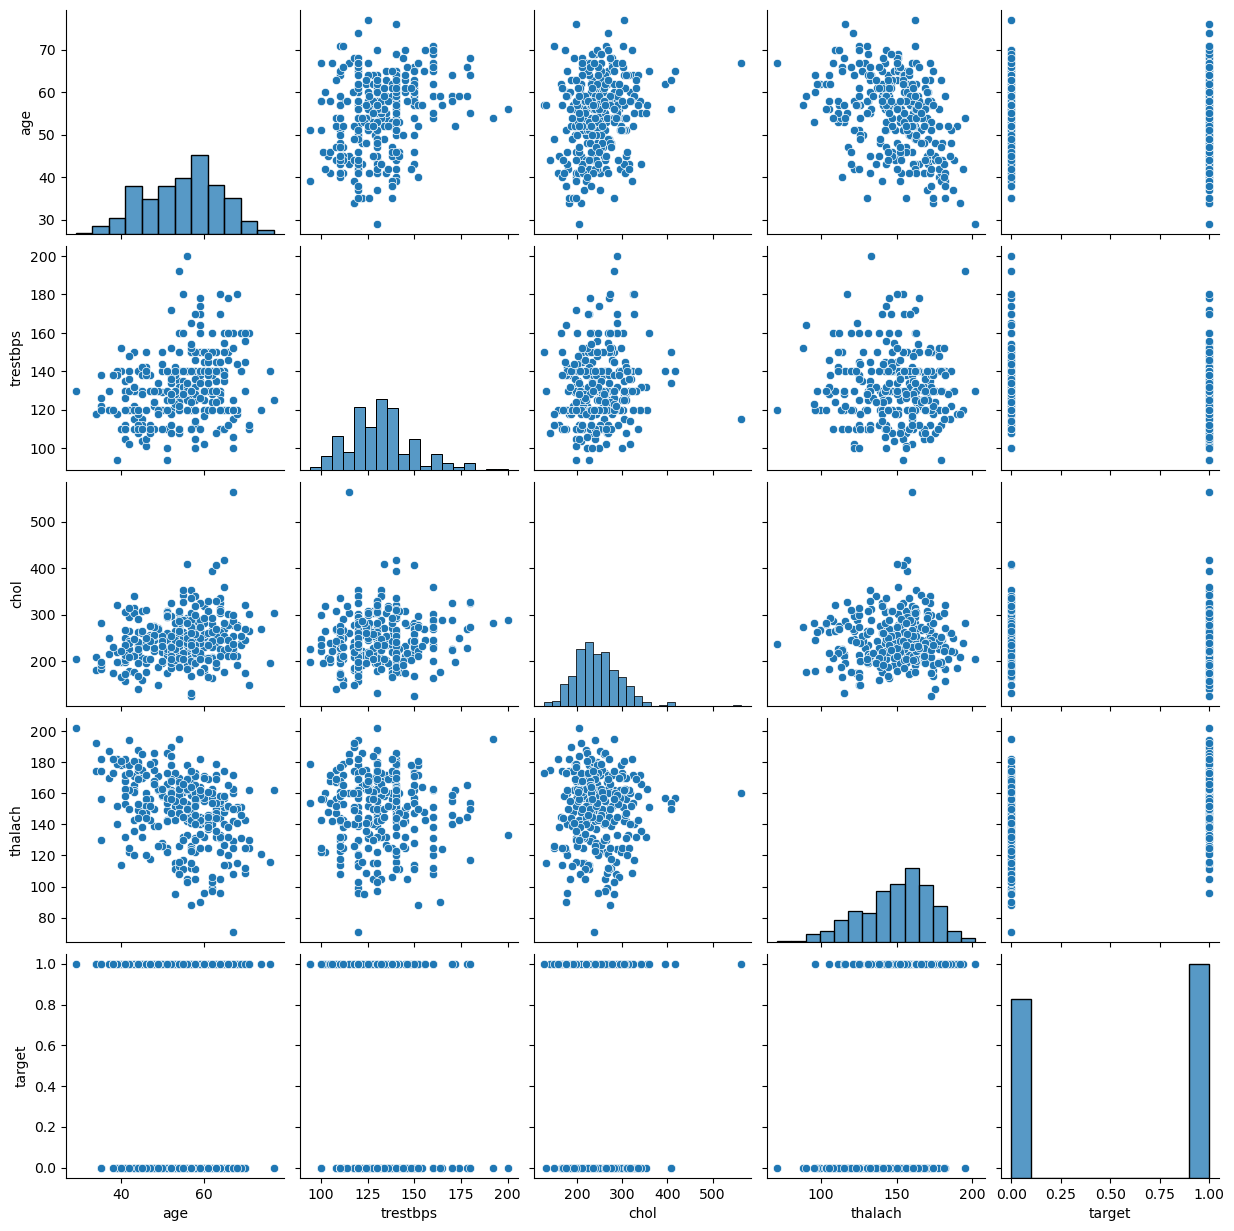

In [26]:
# Add hue=target to add test results to scatter plot.
# Code Here
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']])

**Create a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

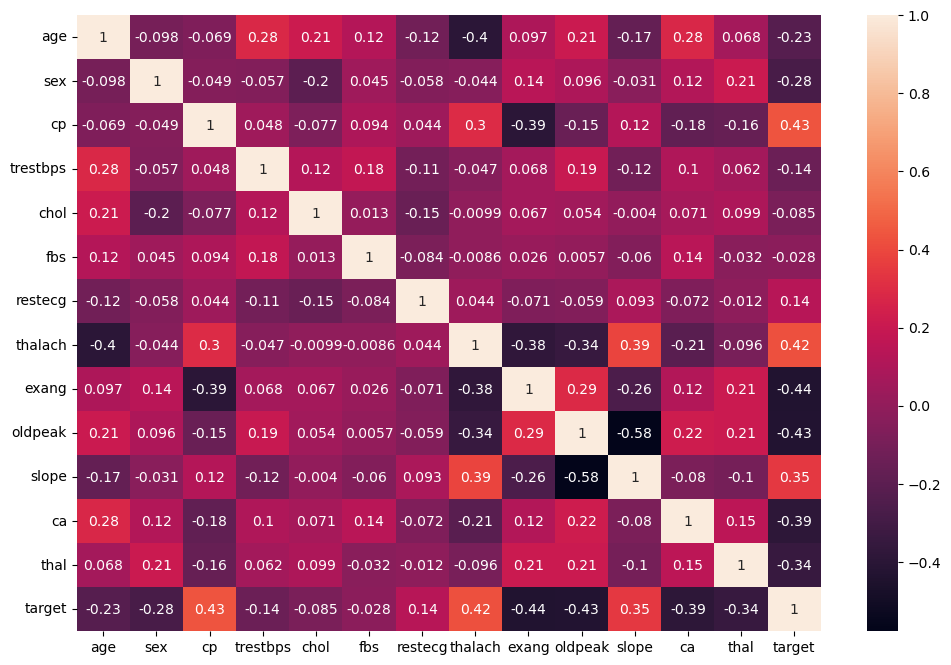

In [28]:
# Code Here
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

----

# Machine Learning

## Train | Test Split and Scaling

**Separate the features from the labels into 2 objects, X and y.**

In [30]:
X = df.drop("target",axis=1)
y = df["target"]

**Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
x_train,x_test,y_train ,y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**(OPTIONAL) Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [15]:
# Code Here

## Logistic Regression Model

**Create a Logistic Regression model** 

**Train and fit a logistic regression model on the training set.**

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()

In [36]:
model.fit(x_train,y_train)

LogisticRegression()

### Coeffecients

**Report back the model's coefficients.**

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the **odds** and can not be directly interpreted as in linear regression.

In [38]:
model.coef_

array([[ 0.00916243, -1.23395556,  0.88004538, -0.01126589, -0.00285603,
        -0.01684743,  0.33721012,  0.02704022, -0.73287312, -0.47899673,
         0.56221495, -0.80227492, -0.8742236 ]])

**The estimated coefficients are the log odds. By exponentiating these values, we can calculate the odds, which are easier to interpret. Use np.exp()**

In [39]:
# Calculate the exponential of all elements in the input array
# Code Here
np.exp(model.coef_)

array([[1.00920453, 0.29113868, 2.41100912, 0.98879734, 0.99714805,
        0.9832937 , 1.40103341, 1.02740912, 0.4805264 , 0.61940451,
        1.75455446, 0.44830794, 0.4171858 ]])

This means:

* The odds for both Age (1st column) and Chest Pain (CP) (3rd column) are **?**, meaning that they are **?** with having heart condition (**class 1**). 

* Let's focus on (CP). We can interpret this as follows. For a 1 unit increase in chest pain type we expect the odds of having heart condition to increase by almost ? times (?%).

* On the other hand, as Age increases by 1 unit, the odds of having heart condition are ?%.

---------

## Model Performance Evaluation

**Let's now evaluate your model on the remaining 10% of the data, the test set.**

**Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

**Predict on test features.**

In [41]:
# Code Here
y_hat=model.predict(x_test)

In [42]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "confusion_matrix.jpg")

In [43]:
# Display the confusion matrix
confusion_matrix(y_test,y_hat)

array([[12,  3],
       [ 2, 14]], dtype=int64)

**Plot the above confusion matrix using plot_confusion_maitrix()**

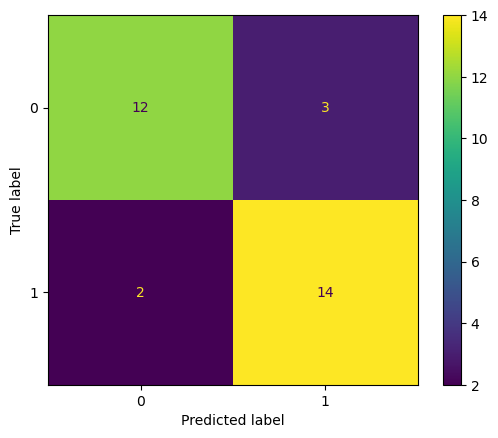

In [52]:
# Code Here
plot_confusion_matrix(model,x_test,y_test)

**Print classification report**

In [54]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



This reports precision, recall and F1-score per class (0 and 1).

Recall: When it actually is a Positive case, how often is it correct ?

Precision: When the Prediction is Positive, how often is it correct ?

F1-score : harmonic means of Precision and Recall.

**If Precision and Recall have a close value to your accuracy, you don't have a problem of imbalanced dataset.**

Support: How many rows you have in this class.

**The above matrix calculates scores per class and gives an average of differences. If we want precision or recall scores using the formulas we seen in theory :**

In [55]:
from sklearn.metrics import precision_score, recall_score

In [56]:
precision_score(y_test,y_hat)

0.8235294117647058

In [57]:
# Code Here (recall)
recall_score(y_test,y_hat)

0.875

### Performance Curves

**Create both the precision recall curve and the ROC Curve.**

In [58]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

**Plot the precision recall curve**

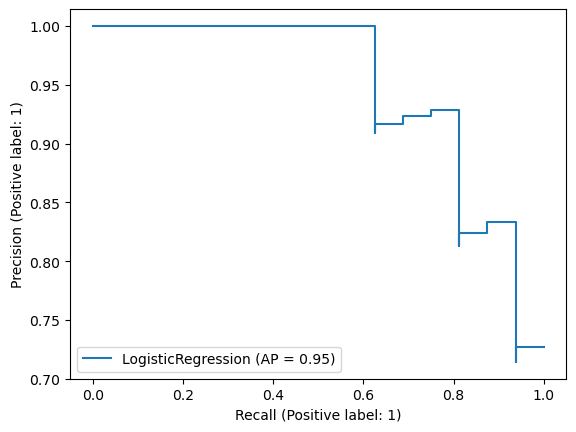

In [63]:
# Code Here# Creates an ROC curve plot
plot_precision_recall_curve(model,x_test,y_test)

**Plot the roc curve**

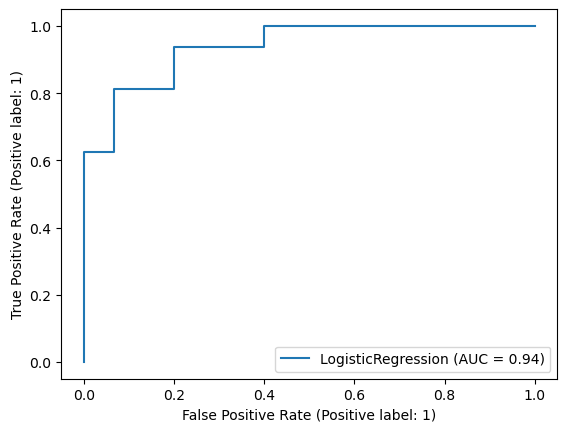

In [64]:
# Code Here
plot_roc_curve(model,x_test,y_test)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [86]:
patient = [[ 48. ,   0. ,   2. , 130. , 275. ,   0. ,   1. , 139. ,   0. ,
          0.2,   2. ,   0. ,   2. ]]

**Predict the class label of the above input**

In [87]:
# Code Here
answer = model.predict(patient)
answer

array([1], dtype=int64)

**Show the probabilities of each class for the above input**

In [88]:
# Code Here
model.predict_proba(patient)

array([[0.03251573, 0.96748427]])

----

## Great Job!